# Zadanie domowe SiAD
#### Jakub Wiśniowski, nr albumu: 151831, grupa lab. 3

### Wstęp
W poniższej pracy skupiam się na statystycznej analizie czasu snu ludzi oraz na różnicach w czasie i jakości snu ludzi z różnych grup. Analizowane będą różne czynniki, które potencjalnie mogą wprowadzić różnice w wyżej wymienionych parametrach snu. W poniższym zbiorze zostały umieszczone następujące informacje o badanej osobie:

1. Płeć
2. Wiek
3. Zawód

W przypadku snu uzyskano dwa parametry:

4. Długość (podana w godzinach na dobę)
5. Jakość snu oceniana przez badanego (podana w skali od 1 do 10

Ponadto dodane zostały inne parametry dotyczące stanu fizycznego danej osoby:

6. Poziom aktywności fizycznej (podany w minutach na dzień)
7. poziom stresu (w skali od 1 do 10)
8. Kategoria BMI (niedowaga, norma, nadwaga oraz otyłość)
9. Ciśnienie krwi (skurczowe/rozkurczowe podane w milimetrach słupka rtęci)
10. Tętno (uderzenia na minutę)
11. Liczba dziennych kroków
12. Ewentualne zaburzenia snu (brak, bezsenność lub bezdech senny)

Dane zostały zebrane jako wynik obserwacji przez użytkownika Laksika Tharmalingam na platformie kaggle.com. Zbiór danych dostępny jest pod adresem: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### UWAGA
#### W katalogu z zadaniem powinien znajdować się plik .csv, z którego będą odczytywane dane

# 1. Wczytanie danych
Zmienna all_df przechowuje data frame odczytany z pliku sleep.csv

In [130]:
options(warn=0)
all_df <- read.csv("sleep.csv")
all_df

Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


# 2. Analiza eksploracyjna oraz wyznaczenie statystyk opisowych
### 2.1 Ogólna długość snu
Na początek prosta analiza. Utworzony zostanie szereg rozdzielczy zawierający przedziały czasu trwania snu oraz histogram opisujący długość snu. Na początek bez analizy innych parametrów. Liczba klas (k) zostanie wyliczona na podstawie wzoru:

$$
  k\approx \sqrt{n}
$$

Przy czym wartość ta zostanie zaokrąglona w górę do najbliższej liczby całkowitej.

In [131]:
n = nrow(all_df)
k = ceiling(sqrt(n))
sleep_durations <- cut(all_df$Sleep.Duration, breaks=k)
czas_snu <- as.data.frame(table(sleep_durations))
names(czas_snu) <- c("Czas snu (h)", "Częstość")
czas_snu

Czas snu (h),Częstość
"(5.8,5.93]",6
"(5.93,6.07]",31
"(6.07,6.21]",37
"(6.21,6.34]",13
"(6.34,6.47]",9
"(6.47,6.61]",46
"(6.61,6.75]",5
"(6.75,6.88]",5
"(6.88,7.01]",3
"(7.01,7.15]",19


W przypadku histogramu, długość przedziału została wyznaczona na podstawie wzoru:
$$
h = \alpha^m\cdot2,64 \cdot IQR \cdot n^{-\frac{1}{3}}
$$
Przy czym $\alpha$ oraz $m$ to parametry dobrane empirycznie.

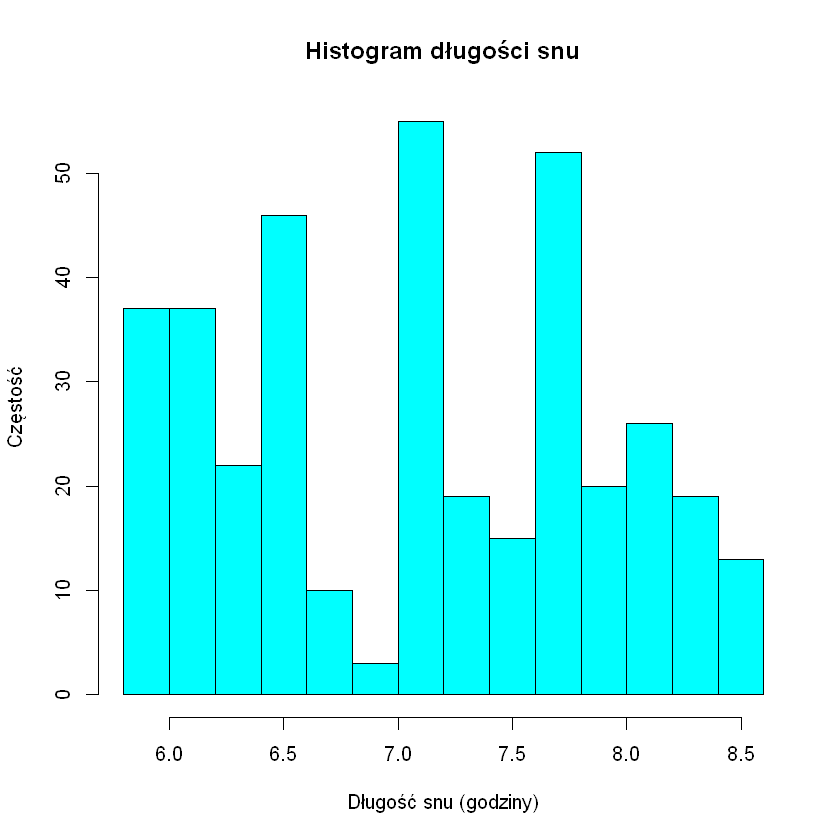

In [132]:
alpha = 0.72
m = 2
h = (alpha^m)*2.64*IQR(all_df$Sleep.Duration)*n^(-1/3)
hist(all_df$Sleep.Duration, breaks=(max(all_df$Sleep.Duration)-min(all_df$Sleep.Duration))/h, 
     main="Histogram długości snu", xlab="Długość snu (godziny)", ylab="Częstość", col="cyan")

Poniżej przedstawiono podstawowe statystyki opisowe powyższego zbioru danych. 

In [133]:
czas_snu <- all_df$Sleep.Duration
n <- length(czas_snu)
srednia <- mean(czas_snu)
wariancja <- var(czas_snu)
od_st <- sd(czas_snu)
mediana <- median(czas_snu)
IQR <- IQR(czas_snu)
mom3 <- sum((czas_snu-srednia)^3)/n
mom4 <- sum((czas_snu-srednia)^4)/n
skosnosc <- mom3/(od_st^3)
kurtoza <- mom4/(od_st^4)
parametry <- c(srednia, wariancja, od_st, mediana, IQR, skosnosc, kurtoza)
names(parametry) <- c("Średnia", "Wariancja", "Odchylenie standardowe", "Mediana", "Rozstęp międzykwartylowy", "Skośność", "Kurtoza")
parametry <- as.data.frame(parametry)
colnames(parametry) <- "Wartości parametrów"
parametry

,Wartości parametrów
Średnia,7.13208556
Wariancja,0.63306963
Odchylenie standardowe,0.79565673
Mediana,7.20000000
Rozstęp międzykwartylowy,1.40000000
Skośność,0.03725369
Kurtoza,1.70547190


Zobaczmy, co powie nam analiza powyższych parametrów.

Rzeczywiście wartość średniej zgadza się z tym, co widzimy na histogramie. Nie dziwi nas też wartość mediany. 

Wartość parametru skośności jest prawie równa 0, co może sugerować (ale nie musi), że rozkład danych jest niemal idealnie symetryczny. I rzeczywiście histogram ukazuje, że największa wartość częstości jest blisko połowy wartości rozstępu danych.

Współczynnik kurtozy jest mniejszy niż 3, co wskazuje na to, że dane są "mniej wyostrzone" w stosunku do rozkładu normalnego.



### 2.2 Długość snu ze względu na płeć
Warto sprawdzić również, jak różnią się czasy snu kobiet i mężczyzn. W tym celu utworzone zostaną dwie zmiennie typu data frame. Dane również przedstawione zostaną za pomocą szeregów rozdzielczych i histogramów.

In [134]:
female_df <- subset(all_df, Gender == "Female")
male_df <- subset(all_df, Gender == "Male")

In [135]:
n_male <- nrow(male_df)
n_female <- nrow(female_df)
kf = ceiling(sqrt(n_female))
km = ceiling(sqrt(n_male))
f_s <- cut(female_df$Sleep.Duration, breaks=kf)
f_s <- as.data.frame(table(f_s))
names(f_s) <- c("Czas snu (h)", "Częstość (kobiety)")
m_s <- cut(male_df$Sleep.Duration, breaks=km)
m_s <- as.data.frame(table(m_s))
names(m_s) <- c("Czas snu (h)", "Częstość (mężczyźni)")
m_s
f_s

Czas snu (h),Częstość (mężczyźni)
"(5.9,6.06]",21
"(6.06,6.21]",16
"(6.21,6.37]",13
"(6.37,6.53]",21
"(6.53,6.69]",2
"(6.69,6.84]",3
"(6.84,7]",1
"(7,7.16]",6
"(7.16,7.31]",28
"(7.31,7.47]",4


Czas snu (h),Częstość (kobiety)
"(5.8,5.99]",3
"(5.99,6.19]",28
"(6.19,6.38]",6
"(6.38,6.57]",14
"(6.57,6.76]",21
"(6.76,6.96]",6
"(6.96,7.15]",13
"(7.15,7.34]",22
"(7.34,7.54]",2
"(7.54,7.73]",0


Na podstawie szeregów rozdzielczych ciężko wysnuć jakąkolwiek hipotezę, dlatego dla lepszej wizualizacji posłużymy się histogramami.

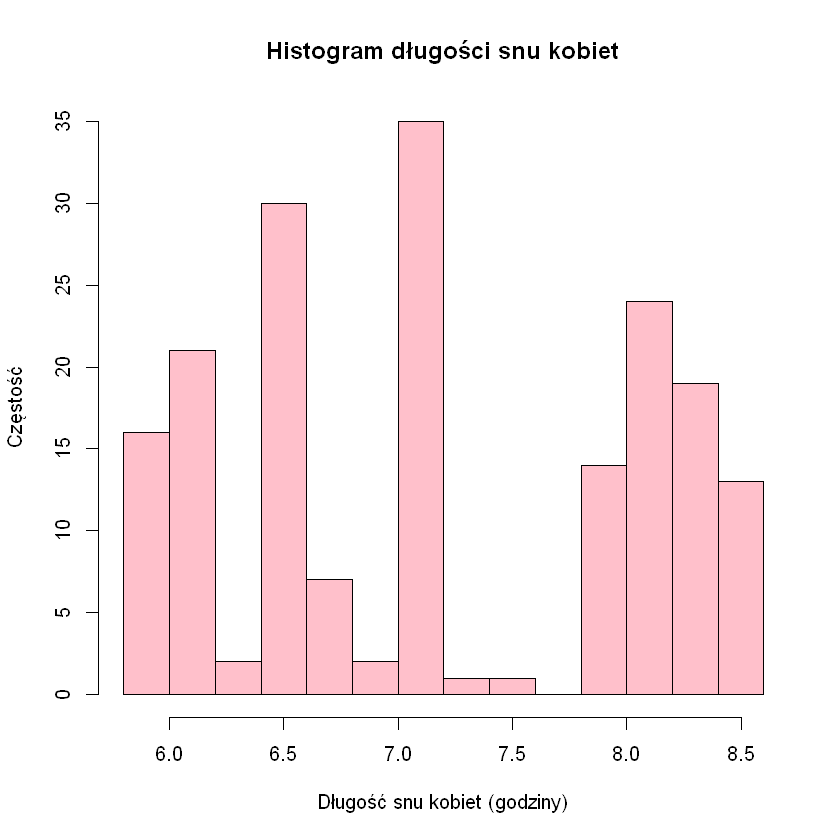

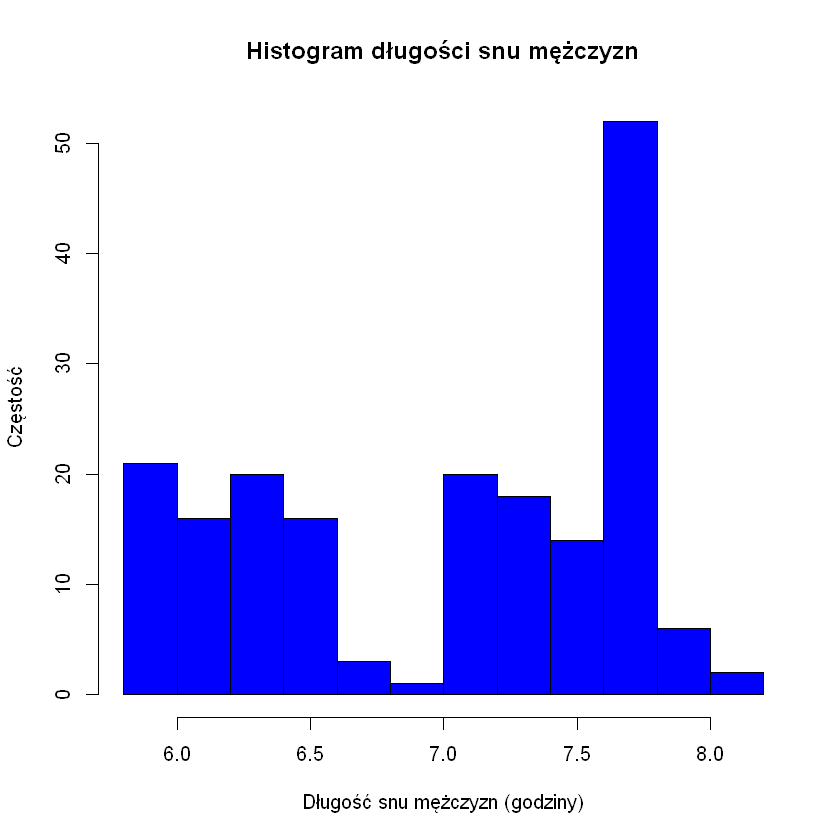

In [136]:
alphaf = 0.5
mf = 2
hf = (alphaf^mf)*2.64*IQR(female_df$Sleep.Duration)*n_female^(-1/3)
hist(female_df$Sleep.Duration, breaks=(max(female_df$Sleep.Duration)-min(female_df$Sleep.Duration))/hf, 
     main="Histogram długości snu kobiet", xlab="Długość snu kobiet (godziny)", ylab="Częstość", col="pink")
alpham = 0.5
mm = 2
hm = (alpham^mm)*2.64*IQR(male_df$Sleep.Duration)*n_male^(-1/3)
hist(male_df$Sleep.Duration, breaks=(max(male_df$Sleep.Duration)-min(male_df$Sleep.Duration))/hf, 
     main="Histogram długości snu mężczyzn", xlab="Długość snu mężczyzn (godziny)", ylab="Częstość", col="blue")

Wartości statystyk opisowych dla powyższych zbiorów danych przedstawiono poniżej:

In [137]:
czas_snu <- female_df$Sleep.Duration
n <- length(czas_snu)
srednia <- mean(czas_snu)
wariancja <- var(czas_snu)
od_st <- sd(czas_snu)
mediana <- median(czas_snu)
IQR <- IQR(czas_snu)
mom3 <- sum((czas_snu-srednia)^3)/n
mom4 <- sum((czas_snu-srednia)^4)/n
skosnosc <- mom3/(od_st^3)
kurtoza <- mom4/(od_st^4)
parametry_k <- c(srednia, wariancja, od_st, mediana, IQR, skosnosc, kurtoza)

czas_snu <- male_df$Sleep.Duration
n <- length(czas_snu)
srednia <- mean(czas_snu)
wariancja <- var(czas_snu)
od_st <- sd(czas_snu)
mediana <- median(czas_snu)
IQR <- IQR(czas_snu)
mom3 <- sum((czas_snu-srednia)^3)/n
mom4 <- sum((czas_snu-srednia)^4)/n
skosnosc <- mom3/(od_st^3)
kurtoza <- mom4/(od_st^4)
parametry_m <- c(srednia, wariancja, od_st, mediana, IQR, skosnosc, kurtoza)

parametry <- data.frame(parametry_k, parametry_m)
colnames(parametry) <- c("Kobiety", "Mężczyźni")
rownames(parametry) <- c("Średnia", "Wariancja", "Odchylenie standardowe", "Mediana", "Rozstęp międzykwartylowy", "Skośność", "Kurtoza")
parametry

,Kobiety,Mężczyźni
Średnia,7.22972973,7.0365079
Wariancja,0.77340482,0.4805218
Odchylenie standardowe,0.87943437,0.6931968
Mediana,7.20000000,7.2000000
Rozstęp międzykwartylowy,1.60000000,1.4000000
Skośność,0.06661353,-0.2724855
Kurtoza,1.52388152,1.4676017


Z parametrów można wyczytać, że kobiety mają średnio dłuższy czas snu niż mężczyźni (zostanie to jeszcze przetestowane). Ponadto, analizując skośności obu rozkładów, zestaw danych kobiet ma skośność bliską 0, co sugeruje symetryczność wykresu. Natomiast dane mężczyzn mają niewielką skośność ujemną, co wskazuje na to, że rozkład ten jest nieznacznie asymetryczny i lewostronny.

# 3. Testy statystyczne

### 3.1. Test dla jednej populacji - długość snu ogółem
Według naukowców, prawidłowy czas snu jest równy około 7 godzin. Sprawdźmy zatem za pomocą testu Z (użyty został ten rodzaj testu ze względu na dość duży rozmiar próby oraz założenie, że długość snu jest zmienną losową o rozkładzie normalnym), czy średnia długość snu ($\mu_0$) jest blisko wartości 7 godzin na dobę ($\mu$). Będzie to hipoteza zerowa. Hipoteza pierwsza natomiast będzie mówiła o tym, że długość snu jest różna od 7 godzin.

$$
H_0: \mu_0 = \mu\\
H_1: \mu_0 \neq \mu\\
$$

Przyjęty poziom istotności $\alpha = 0.05$.
Zostanie wyliczona statystyka Z, na podstawie której będzie można powiedzieć coś o hipotezach.

$$
Z = \frac{\mu_0 - \mu}{\sigma}\cdot\sqrt{n}
$$

In [138]:
alpha <- 0.05
mu0 <- mean(all_df$Sleep.Duration)
mu <- 7
n <- nrow(all_df)
sd <- sd(all_df$Sleep.Duration)
Z <- c((mu0-mu)/sd*sqrt(n))
war_kryt <- c(qnorm(1 - alpha/2))
wynik <- data.frame(Z, war_kryt)
colnames(wynik) <- c("Wartość statystyki Z", "Wartość krytyczna")
wynik

Wartość statystyki Z,Wartość krytyczna
3.210446,1.959964


Jak widać wartość statystyki Z znajduje się w przedziale krytycznym. Oznacza to, że odrzucamy hipotezę zerową na rzecz hipotezy pierwszej. Średnia długość snu jest różna od 7 godzin.

### 3.2. Test dla dwóch populacji - mężczyźni i kobiety

Przy analizie eksploracyjnej została postawiona hipoteza, że kobiety śpią dłużej niż mężczyźni. W celu wyboru testu, który pozwoli zweryfikować prawdziwość tej hipotezy, należy najpierw sprawdzić, jakie są liczności poszczególnych zbiorów.

In [139]:
female_df <- subset(all_df, Gender == "Female")
male_df <- subset(all_df, Gender == "Male")
nf <- nrow(female_df)
nm <- nrow(male_df)
wynik <- data.frame(nf, nm)
colnames(wynik) <- c("Liczność kobiet", "Liczność mężczyzn")
wynik

Liczność kobiet,Liczność mężczyzn
185,189


Jak widać, liczności obu grup są dostatecznie duże, by ponownie użyć testu Z. Tym razem jednak będzie to test dla dwóch prób niezależnych. Zostanie wylicznona statystyka Z z użyciem odpowiedniego wzoru, a następnie porównana z wartością krytyczną dla poziomu istotności równego $\alpha = 0.05$. Najpierw jednak postawmy odpowiednie hipotezy. Hipoteza zerowa mówi o tym, że średnie czasy snu w przypadku obu grup są takie same. Hipoteza pierwsza zaś - że średni czas snu kobiet jest większy niż średni czas snu mężczyzn. Niech $\mu_1$ oznacza średni czas snu kobiet, a $\mu_2$ - średni czas snu mężczyzn. Odchylenia standardowe długości snu i liczności grup kobiet i mężczyzn to odpowiednio $\sigma_1$ i $n_1$ oraz $\sigma_2$ i $n_2$ Zatem:

$$
H_0 : \mu_1 = \mu_2\\
H_1 : \mu_1 > \mu_2
$$

Statystyka Z będzie wyliczona ze wzoru:

$$
Z = \frac{\overline{x}_1 - \overline{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}
$$

Gdzie $\overline{x}_1$ i $\overline{x}_2$ to odpowiednio średnie długości snu kobiet i mężczyzn wyliczone z próby.

In [140]:
kobiety <- female_df$Sleep.Duration
mezczyzni <- male_df$Sleep.Duration
x1 <- mean(kobiety)
x2 <- mean(mezczyzni)
war1 <- var(kobiety)
war2 <- var(mezczyzni)
Z = (x1 - x2)/sqrt(war1/nf + war2/nm)

alpha <- 0.05
kryt <- qnorm(1 - alpha)
wynik <- data.frame(Z,kryt)
colnames(wynik) <- c("Wartość statystyki Z", "Wartość krytyczna")
wynik

Wartość statystyki Z,Wartość krytyczna
2.356537,1.644854


Po wykonaniu testu jesteśmy w stanie powiedzieć, że należy odrzucić hipotezę zerową na rzecz pierwszej. To oznacza, że w istocie czas snu kobiet jest dłuższy od czasu snu mężczyzn.

### 3.3. Test współzależności - jakość snu a kategoria BMI

Ten test pozwoli nam sprawdzić, czy kategoria BMI ma wpływ na jakość snu. W tym celu należy ustalić, jaka ocena snu jest dobra, a jaka zła. Przyjmijmy następującą konwencję:

| Ocena snu | Jakość snu |
| :-: | :-: |
| 0 - 3 | Słaba |
| 4 - 6 | Średnia |
| 7 - 8 | Dobra |
| 9 - 10 | Bardzo dobra |

Należy teraz podliczyć badanych uwzględniając podział na kategorie BMI oraz jakość snu.

In [141]:
jakosc_df <- all_df[,c("Quality.of.Sleep","BMI.Category")]
for(x in 1:nrow(jakosc_df)){
    if(jakosc_df$Quality.of.Sleep[x]>8){
        jakosc_df$Quality.of.Sleep[x]<-"Bardzo dobra"
    }
    else if(jakosc_df$Quality.of.Sleep[x]>6){
        jakosc_df$Quality.of.Sleep[x]<-"Dobra"
    }
    else if(jakosc_df$Quality.of.Sleep[x]>3){
        jakosc_df$Quality.of.Sleep[x]<-"Średnia"
    }
    else{
         jakosc_df$Quality.of.Sleep[x]<-"Słaba"
    }
}
wynik <- table(jakosc_df)
wynik<-addmargins(wynik,c(1,2),sum)
wynik

Margins computed over dimensions
in the following order:
1: Quality.of.Sleep
2: BMI.Category


,Normal,Normal Weight,Obese,Overweight,sum
Bardzo dobra,32,4,2,33,71
Dobra,130,12,4,40,186
Średnia,33,5,4,75,117
sum,195,21,10,148,374


Aby uzyskać dane, na których będzie można przeprowadzić test Chi-kwadrat, zmniejszmy liczbę kategorii BMI. Przyjmijmy dwie kategorie: "Norma" i "Powyżej normy". Zatem tabela prezentuje się następująco:

| Jakość \ Kat.BMI | Norma | Powyżej normy | SUMA |
| --: | :-: | :-: | :-: |
| Bardzo dobra | 36 | 35 | 71 |
| Dobra | 142 | 44 | 186 |
| Średnia | 38 | 79 | 117 |
| SUMA | 216 | 158 | 374 |

Sprawdzimy teraz, używając testu chi-kwadrat, czy kategoria BMI ma związek z jakością snu. Wartość parametru Chi-kwadrat policzymy ze wzoru:

$$
\chi^2 = \sum_{i=0}^n\sum_{j=0}^m\frac{(O_{ij}-E_{ij})^2}{E_{ij}}
$$

Gdzie $n$ i $m$ to odpowiednio liczby wierszy i kolumn, $O_{ij}$ oznacza zaobserwowaną wartość w i-tym wierszu i j-tej kolumnie, a $E_{ij}$ oznacza oczekiwaną wartość w i-tym wierszu i j-tej kolumnie. Ilość stopni swobody to: $(n-1)(m-1) = 2$. Przyjęty poziom istotności: $\alpha = 0.05$. Hipotezy wyglądają następująco:

$$
H_0 : p = p^o\\
H_1 : p \neq p^o
$$

Gdzie $p$ jest rozkładem prawdopodobieństwa wystąpienia zmiennych zaobserwowanych, a $p^o$ jest oczekiwanym rozkładem prawdopodobieństwa.

In [142]:
O <- c(36,35,142,44,38,79)
N <- sum(O)
E <- c((71*216)/N,(71*158)/N,(71*216)/N,(71*158)/N,(71*216)/N,(71*158)/N)
Xsq <- sum(((O-E)^2)/E)
df <- 2
alpha <- 0.05
kryt <- qchisq(1-alpha, df)
wynik <- data.frame(Xsq,kryt)
colnames(wynik) <- c("Wartość statystyki", "Wartość krytyczna")
wynik

Wartość statystyki,Wartość krytyczna
337.0172,5.991465


Jak widać, wartość statystyki znacznie przekracza wartość krytyczną, co oznacza, że należy odrzucić hipotezę zerową i przyjąć hipotezę pierwsza. To znaczy, że kategoria BMI istotnie wpływa na jakość snu.

# 4. Podsumowanie i wnioski
W powyższej pracy zdecydowałem się na zebranie podstawowych informacji na temat długości snu ludzi, gdyż jako student uważam, że sen jest ważnym aspektem rozwoju umysłowego. Statystyka potwierdziła również badania naukowców, którzy twierdzą, że kobiety potrzebują średnio więcej czasu na sen niż mężczyźni.

Powyższa praca ukazała również, że średnia długość snu ludzi zawiera się w przedziale od 6h do 8h na dobę, czyli takiej rekomendowanej przez specjalistów.

Ponadto statystycznie można stwierdzić, że BMI wpływa na jakość snu człowieka.

Takie badania statystyczne można poprowadzić dalej licząc współczynniki mówiące w jaki sposób wpływa BMI na jakość snu, a także przeprowadzając podobne testy uwzględniając inne parametry takie jak ciśnienie krwi czy poziom stresu.